### Abstract:

Tresury Futures are inversely proportional to Federal Rates. When rates are being changed, Tresury Futures also changed in opposite direction. Hypothesis for an opportunity is when movements of rates and futures are in same direction for specific period of time then there is an opportunity for the investment/profit (long/short). In this project detection of this hypothesis is developed and then analysis is carried out on day to day basis for 35 years of history. 


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [2]:
#no of days which are used for understanding the trend
n = 7
#no of days for that slope tendency is checked
m = 6
#no of days for that conditions are checked
k = 2
#profit in index
p = 1  #(which is approx 100 bps)

data = pd.read_excel("C:\Trading\Trade-Bot\data.xlsx", sheet_name="data_future")
data.describe()

,x,10yt_future,rate,mid_mth_ret,one_mth_ret,two_mth_ret,three_mth_ret,four_mth_ret,fed_rate_change
count,9482.00000,9482.000000,9482.000000,9468.000000,9454.000000,9423.000000,9393.000000,9363.000000,0.0
mean,4741.50000,109.303876,4.057192,0.097418,0.199304,0.433811,0.645859,0.834438,NaN
std,2737.36196,14.331254,3.194684,1.621120,2.359827,3.480514,4.303695,4.953266,NaN
min,1.00000,68.375000,0.040000,-11.793943,-13.195498,-14.591344,-14.728682,-15.604537,NaN
25%,2371.25000,100.531300,1.020000,-0.862591,-1.152506,-1.556110,-1.835084,-2.326189,NaN
50%,4741.50000,110.031300,4.110000,0.123310,0.274020,0.302206,0.632578,0.828958,NaN
75%,7111.75000,120.156300,6.070000,1.076032,1.531958,2.452500,3.058264,3.747825,NaN
max,9482.00000,135.265600,16.170000,10.210814,11.387369,17.481203,23.577589,21.770792,NaN


Slope and Slope tendency for 10year Treasury Future and Federal Rate are calculated below.

Slope is first derivative of data. 'n' is number for which slope is being calculated.

Tendency is second derivative of data and first derivative of slope. 'm' signifies no. of slope data being used in calculation.

In [3]:
data['slope_10yt'] = float('nan')
data['slope_rate'] = float('nan')
data['slope_10yt_tendency'] = float('nan')
data['slope_rate_tendency'] = float('nan')

for i in range(n,data.shape[0]+1):
    #print(i)
    temp = data[i-n:i]
    data.iloc[i-1,10] = linregress(temp['x'],temp['10yt_future']).slope
    data.iloc[i-1,11] = linregress(temp['x'],temp['rate']).slope
    
    if i>m+n:
        temp1 = data[i-m:i]
        data.iloc[i-1,12] = linregress(temp1['x'],temp1['slope_10yt']).slope
        data.iloc[i-1,13] = linregress(temp1['x'],temp1['slope_rate']).slope    

print('Slope Calculation Completed!')

Slope Calculation Completed!


Intensity: This number describes the percentile of slope, which help to understand current position w.r.t. to history.

Opportunity: It shows True when above hypothesis is true and there is a opportunity for profit making and vice versa.

long / short: Based on above numbers long or short signals are crated for investment in Treasury Futures.

In [4]:
data['intensity_10yt'] = data['slope_10yt'].apply(lambda x: scipy.stats.percentileofscore(abs(data['slope_10yt']), abs(x)))
data['intensity_rate'] = data['slope_rate'].apply(lambda x: scipy.stats.percentileofscore(abs(data['slope_rate']), abs(x)))

data['opportunity'] = (data['slope_10yt']*data['slope_rate'] > 0) & (data['slope_10yt_tendency']*data['slope_rate_tendency'] > 0)
data['rate_dominant'] = abs(data['slope_10yt']) < abs(data['slope_rate'])

data['long/short'] = float('nan')
for i in range(m,data.shape[0]+1):
    #print(i)
    temp = data[i-k:i]
    
    if temp[['opportunity']].eq(True).all()[0]:
        
        if data.iloc[i-1,11] < 0:
            data.iloc[i-1,18] = 'long'
        else :
            data.iloc[i-1,18] = 'short'

print('Long / Short prediction Completed!')

Long / Short prediction Completed!


This algorithm is designed to get specific index change profit 'p'. When it is reached at particular day and index, they are stored for further analysis.

In [5]:
data['profit_index'] = float('nan')
data['days'] = float('nan')

for i in range(0,data.shape[0]):
    
    if data.iloc[i,18] == 'long':
            
        temp2 = data[(data['10yt_future'] > data.iloc[i,2] + p ) & (data['date'] > data.iloc[i,0])]
        if temp2.shape[0] > 0:
            data.iloc[i,19] = temp2.iloc[0,2]
            data.iloc[i,20] = temp2.iloc[0,0] - data.iloc[i,0]
    
    elif data.iloc[i,18] == 'short':
        
        temp2 = data[(data['10yt_future'] < data.iloc[i,2] - p ) & (data['date'] > data.iloc[i,0])]
        if temp2.shape[0] > 0:
            data.iloc[i,19] = temp2.iloc[0,2]
            data.iloc[i,20] = temp2.iloc[0,0] - data.iloc[i,0]
            
print('Profit_index and Duration Calculation Completed!')

Profit_index and Duration Calculation Completed!


In [6]:
data.head(10)

,date,x,10yt_future,rate,mid_mth_ret,one_mth_ret,two_mth_ret,three_mth_ret,four_mth_ret,fed_rate_change,...,slope_rate,slope_10yt_tendency,slope_rate_tendency,intensity_10yt,intensity_rate,opportunity,rate_dominant,long/short,profit_index,days
0,1982-05-03,1,71.2813,15.27,2.411151,-1.271441,0.219132,7.628228,16.966161,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN
1,1982-05-04,2,71.8125,15.94,1.610165,-2.001741,-1.174865,6.614447,16.231575,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN
2,1982-05-05,3,71.9375,15.74,1.077324,-2.172024,-0.130252,4.952215,15.073918,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN
3,1982-05-06,4,72.9688,15.25,-0.830903,-3.854387,-0.856530,4.539611,11.691572,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN
4,1982-05-07,5,73.2500,14.90,-1.416382,-5.034130,0.255973,4.223618,12.542662,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN
5,1982-05-10,6,73.1250,14.59,-1.333333,-5.897436,-0.256410,4.230838,12.265026,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,NaN
6,1982-05-11,7,73.2500,14.89,-2.645051,-6.228669,-0.597270,3.839590,13.225256,NaN,...,-0.167143,NaN,NaN,94.051888,97.743092,False,False,NaN,NaN,NaN
7,1982-05-12,8,72.8750,15.38,-1.801029,-5.746141,-0.300103,5.060034,14.794237,NaN,...,-0.144286,NaN,NaN,77.684033,96.815018,False,False,NaN,NaN,NaN
8,1982-05-13,9,72.6250,14.89,-1.592014,-5.722823,-0.989604,5.679862,16.006885,NaN,...,-0.082143,NaN,NaN,30.357520,91.773887,False,True,NaN,NaN,NaN
9,1982-05-14,10,73.1250,14.52,-2.735043,-6.367453,-0.769231,6.752137,16.025709,NaN,...,-0.050714,NaN,NaN,16.800253,84.148914,False,True,NaN,NaN,NaN


In [7]:
data.tail(10)

,date,x,10yt_future,rate,mid_mth_ret,one_mth_ret,two_mth_ret,three_mth_ret,four_mth_ret,fed_rate_change,...,slope_rate,slope_10yt_tendency,slope_rate_tendency,intensity_10yt,intensity_rate,opportunity,rate_dominant,long/short,profit_index,days
9472,2019-12-18,9473,128.1719,1.55,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000357,-0.000719,0.000143,58.226113,10.783590,False,False,NaN,NaN,NaN
9473,2019-12-19,9474,128.3125,1.55,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,-0.012247,0.000020,58.769247,4.360894,False,False,NaN,NaN,NaN
9474,2019-12-20,9475,128.2500,1.55,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000357,-0.010508,-0.000153,34.117275,10.783590,True,False,NaN,NaN,NaN
9475,2019-12-23,9476,128.0938,1.55,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000714,-0.005517,-0.000357,50.580046,13.588905,True,False,long,NaN,NaN
9476,2019-12-24,9477,128.3125,1.55,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.001071,0.012948,-0.000357,15.882725,17.274837,False,False,NaN,NaN,NaN
9477,2019-12-26,9478,128.3750,1.55,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.026723,-0.000153,3.005695,4.360894,False,False,NaN,NaN,NaN
9478,2019-12-27,9479,128.6563,1.55,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.036688,0.000020,26.750686,4.360894,False,False,NaN,NaN,NaN
9479,2019-12-30,9480,128.5313,1.55,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.035620,0.000143,28.564649,4.360894,False,False,NaN,NaN,NaN
9480,2019-12-31,9481,128.4219,1.55,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.035843,0.000194,28.200802,4.360894,False,False,NaN,NaN,NaN
9481,2020-01-02,9482,128.6250,1.55,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.020934,0.000153,31.965830,4.360894,False,False,NaN,NaN,NaN


Total No. of Records: 

In [8]:
data['x'].count()

9482

Total No. of Long Signals:

In [9]:
data[data['long/short'] == 'long']['long/short'].count()

659

Histogram is plotted with all long signals, to undrstand distribution of days in particular profit in index 'p' is achieved. Algorithm is setup for shortime investments so in 71% cases, profit is gained less in than 75 days.

Profit: no. of contracts x p x 1000 
(Reference: https://www.cmegroup.com/trading/interest-rates/basics-of-us-treasury-futures.html)

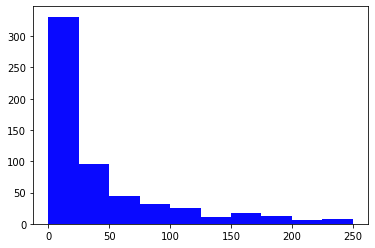

In [10]:
temp = data[data['long/short'] == 'long']['days'].dropna()

templist = list()
for each in temp:
    templist.append(int(each.days))
    
num_bins = 10
n, bins, patches = plt.hist(templist, num_bins, facecolor='blue', alpha=10, range=(0,250))
plt.show()

In [11]:
(n[0]+n[1]+n[2]) / (data[data['long/short'] == 'long']['long/short'].count()) * 100

71.32018209408194

Total no. of Short Signals:

In [12]:
data[data['long/short'] == 'short']['long/short'].count()

841

Histogram is plotted with all short signals, to undrstand distribution of days in particular profit in index 'p' is achieved. Algorithm is setup for shortime investments so in 58% cases, profit is gained in less than 75 days.

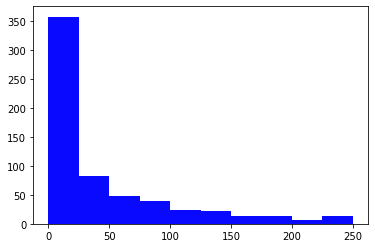

In [13]:
temp = data[data['long/short'] == 'short']['days'].dropna()

templist = list()
for each in temp:
    templist.append(int(each.days))
    
num_bins = 10
n, bins, patches = plt.hist(templist, num_bins, facecolor='blue', alpha=10, range=(0,250))
plt.show()

In [14]:
(n[0]+n[1]+n[2]) / (data[data['long/short'] == 'short']['long/short'].count()) * 100

58.026159334126035

Conclusion:
    
•	Implemented hypothesis-based trading strategy which indicates daily long / short signals for Treasury Future using Python

•	Optimized algorithm using federal rate which yield $40k profit per year per contract within 50 days with accuracy of 70%
